# 1. Load The Tweets Dataset 

In [1]:
import pandas as pd


In [3]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# 0 refers to positive sentiment, 1 is negative sentiment

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
# check for missing values
data.isnull().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment'>

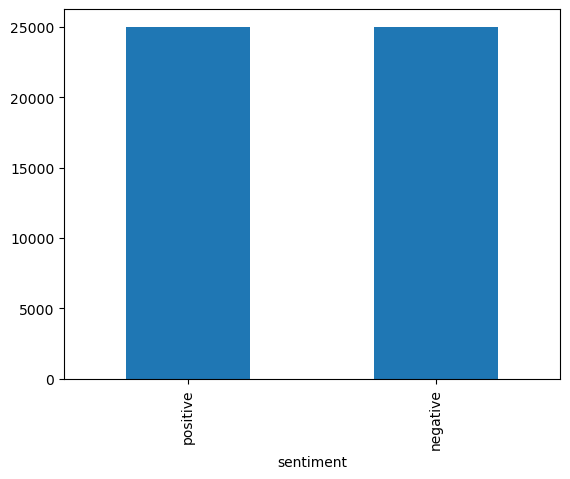

In [7]:
# plot the label counts 
data['sentiment'].value_counts().plot(kind='bar')

# 2. Data Cleaning

In [8]:
data['review'][24]

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It's great to see J.Beals but she's only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />"

In [9]:
import re

In [11]:
# Substitute 's with " is" 
re.sub(r"'s\b", " is", data['review'][24])

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It is great to see J.Beals but she is only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />"

In [12]:
# Removing the user mentions
data['review'][11]

"I saw this movie when I was about 12 when it came out. I recall the scariest scene was the big bird eating men dangling helplessly from parachutes right out of the air. The horror. The horror.<br /><br />As a young kid going to these cheesy B films on Saturday afternoons, I still was tired of the formula for these monster type movies that usually included the hero, a beautiful woman who might be the daughter of a professor and a happy resolution when the monster died in the end. I didn't care much for the romantic angle as a 12 year old and the predictable plots. I love them now for the unintentional humor.<br /><br />But, about a year or so later, I saw Psycho when it came out and I loved that the star, Janet Leigh, was bumped off early in the film. I sat up and took notice at that point. Since screenwriters are making up the story, make it up to be as scary as possible and not from a well-worn formula. There are no rules."

In [13]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['review'][11])

"I saw this movie when I was about 12 when it came out. I recall the scariest scene was the big bird eating men dangling helplessly from parachutes right out of the air. The horror. The horror.<br /><br />As a young kid going to these cheesy B films on Saturday afternoons, I still was tired of the formula for these monster type movies that usually included the hero, a beautiful woman who might be the daughter of a professor and a happy resolution when the monster died in the end. I didn't care much for the romantic angle as a 12 year old and the predictable plots. I love them now for the unintentional humor.<br /><br />But, about a year or so later, I saw Psycho when it came out and I loved that the star, Janet Leigh, was bumped off early in the film. I sat up and took notice at that point. Since screenwriters are making up the story, make it up to be as scary as possible and not from a well-worn formula. There are no rules."

In [14]:
# remive the hashtags
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [15]:
re.sub("#", "", data['review'][0])

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [16]:
# Removing the hyperlinks
re.sub(r"http\S+", "", data['review'][0])

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [17]:
# Retain on the alphabets (get rid of punctuations, special char, digits)
data['review'][25]

"The Karen Carpenter Story shows a little more about singer Karen Carpenter's complex life. Though it fails in giving accurate facts, and details.<br /><br />Cynthia Gibb (portrays Karen) was not a fine election. She is a good actress , but plays a very naive and sort of dumb Karen Carpenter. I think that the role needed a stronger character. Someone with a stronger personality.<br /><br />Louise Fletcher role as Agnes Carpenter is terrific, she does a great job as Karen's mother.<br /><br />It has great songs, which could have been included in a soundtrack album. Unfortunately they weren't, though this movie was on the top of the ratings in USA and other several countries"

In [18]:
re.sub(r"[^a-zA-Z]", " ", data['review'][0])

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me  br    br   The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word  br    br   It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away  br    br   I would say the main appeal of the show is due to the fa

In [19]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords

In [20]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{"couldn't", 'both', 'having', 'should', 'her', "you'd", 'itself', 'o', 'yours', 'me', "that'll", 'am', 'from', 'here', 'ain', 'you', 'will', 'down', 'wasn', 'shouldn', 'if', "mightn't", 'above', 'hasn', 'an', 'a', 'before', 'then', 'by', 'them', 'd', "didn't", "she's", 'after', 'there', 'himself', 'into', 'him', 'where', 'were', 'why', 'ours', "wouldn't", 'while', 'be', 'has', 'below', 'during', "won't", 'ma', 'those', 'they', 'he', 'm', 'between', 'that', 'now', 'against', 'some', 'under', 't', 'couldn', "shan't", 'not', 'very', 'been', 'doing', 'theirs', 'this', 'whom', 'we', 'once', "shouldn't", 'same', 'most', "needn't", 'these', 'won', "mustn't", "wasn't", 'its', 'don', 'about', 'isn', 'such', 'through', 'in', 'i', 'she', 'our', 'it', 'mightn', 'was', "you're", 'my', 'haven', 'doesn', 'to', 'hadn', 'which', 'did', 'can', 'mustn', 'does', 'until', 'than', 're', "you'll", 'yourself', 'nor', 'y', 'with', 've', 'at', "weren't", 'too', 'ourselves', 'are', "isn't", 'is', "it's", 'hers'

In [21]:
len(nltk_stopwords)

179

In [22]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'seeming', 'well', 'anyone', 'full', 'beyond', 'hereupon', 'wherein', 'thereupon', 'formerly', 'her', 'itself', 'yours', 'me', 'from', 'here', 'will', 'per', 'de', 'etc', 'if', 'everyone', 'above', 'others', 'least', 'before', 'first', 'enough', 'otherwise', 'amoungst', 'them', 'always', 'became', 'five', 'go', 'describe', 'after', 'inc', 'even', 'there', 'perhaps', 'himself', 'were', 'herein', 'while', 'be', 'onto', 'around', 'below', 'us', 'part', 'three', 'between', 'mostly', 'amount', 'now', 'whole', 'that', 'against', 'front', 'not', 'very', 'been', 'either', 'indeed', 'whom', 'once', 'thus', 'nowhere', 'cannot', 'whoever', 'top', 'afterwards', 'amongst', 'about', 'hundred', 'must', 'whenever', 'somewhere', 'hereby', 'in', 'she', 'nine', 'our', 'it', 'forty', 'co', 'was', 'eight', 'made', 'everywhere', 'can', 'whereby', 'whatever', 'within', 'latter', 'than', 're', 'at', 'too', 'are', 'four', 'is', 'couldnt', 'wherever', 'cry', 'had', 'elsewhere', 'name', 'do', 'never', 'found', 

In [23]:
len(sklearn_stopwords)

318

In [24]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'both', 'should', 'her', 'itself', 'yours', 'me', 'am', 'from', 'here', 'you', 'will', 'down', 'if', 'above', 'an', 'a', 'before', 'then', 'by', 'them', 'after', 'there', 'himself', 'into', 'him', 'where', 'were', 'why', 'ours', 'while', 'be', 'has', 'below', 'during', 'those', 'they', 'he', 'between', 'that', 'now', 'against', 'some', 'under', 'not', 'very', 'been', 'this', 'whom', 'we', 'once', 'same', 'most', 'these', 'its', 'about', 'such', 'through', 'in', 'i', 'she', 'our', 'it', 'was', 'my', 'to', 'which', 'can', 'until', 'than', 're', 'yourself', 'nor', 'with', 'at', 'too', 'ourselves', 'are', 'is', 'hers', 'had', 'do', 'off', 'or', 'any', 'of', 'so', 'further', 'up', 'on', 'themselves', 'how', 'own', 'being', 'only', 'because', 'the', 'no', 'your', 'and', 'when', 'what', 'but', 'more', 'his', 'all', 'who', 'again', 'have', 'their', 'out', 'few', 'over', 'other', 'each', 'for', 'yourselves', 'herself', 'as', 'myself'}


In [25]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [26]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [27]:
len(combined_stopwords)

378

In [42]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform sentiments to binary (0 and 1)
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

# Display the encoded sentiments
print(data['sentiment'])


0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32


In [43]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [44]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [45]:
data['review'][63].split()

['Besides',
 'being',
 'boring,',
 'the',
 'scenes',
 'were',
 'oppressive',
 'and',
 'dark.',
 'The',
 'movie',
 'tried',
 'to',
 'portray',
 'some',
 'kind',
 'of',
 'moral,',
 'but',
 'fell',
 'flat',
 'with',
 'its',
 'message.',
 'What',
 'were',
 'the',
 'redeeming',
 'qualities??',
 'On',
 'top',
 'of',
 'that,',
 'I',
 "don't",
 'think',
 'it',
 'could',
 'make',
 'librarians',
 'look',
 'any',
 'more',
 'unglamorous',
 'than',
 'it',
 'did.']

In [46]:
new_sent = ''
for token in data['review'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent    

"besides being boring, the scene were oppressive and dark. the movie tried to portray some kind of moral, but fell flat with it message. what were the redeeming qualities?? on top of that, i don't think it could make librarian look any more unglamorous than it did. "

In [47]:
# !pip install contractions

In [48]:
import contractions
data['review'][24]

"This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It's great to see J.Beals but she's only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who can't get work doesn't feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />"

In [49]:
contractions.fix(data['review'][24])

'This was the worst movie I saw at WorldFest and it also received the least amount of applause afterwards! I can only think it is receiving such recognition based on the amount of known actors in the film. It is great to see J.Beals but she is only in the movie for a few minutes. M.Parker is a much better actress than the part allowed for. The rest of the acting is hard to judge because the movie is so ridiculous and predictable. The main character is totally unsympathetic and therefore a bore to watch. There is no real emotional depth to the story. A movie revolving about an actor who cannot get work does not feel very original to me. Nor does the development of the cop. It feels like one of many straight-to-video movies I saw back in the 90s ... And not even a good one in those standards.<br /><br />'

## Define the Cleaner Function & Apply

In [50]:
import re

In [51]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [52]:
cleaned_reviews = []  # list of cleaned tweets
for twt in data['review']:
    cleaned_reviews.append(tweet_cleaner_without_stopwords(twt))

In [54]:
cleaned_reviews[:5]    

['one of the other reviewer ha mentioned that after watching just oz episode you will be hooked they are right a this is exactly what happened with me br br the first thing that struck me about oz wa it brutality and unflinching scene of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it is hardcore in the classic use of the word br br it is called oz a that is the nickname given to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda them city is home to many aryan muslim gangsta latino christian italian irish and more so scuffle death stare dodgy dealing and shady agreement are never far away br br i would say the main appeal of the show is due to the fact that it go where other show would not dare forget pretty picture

In [55]:
cleaned_reviews[24]

'this wa the worst movie i saw at worldfest and it also received the least amount of applause afterwards i can only think it is receiving such recognition based on the amount of known actor in the film it is great to see j beals but she is only in the movie for a few minute m parker is a much better actress than the part allowed for the rest of the acting is hard to judge because the movie is so ridiculous and predictable the main character is totally unsympathetic and therefore a bore to watch there is no real emotional depth to the story a movie revolving about an actor who cannot get work doe not feel very original to me nor doe the development of the cop it feel like one of many straight to video movie i saw back in the s and not even a good one in those standard br br '

In [56]:
data['review'][1500]

"Oh dear god. This was horrible. There is bad, then there was this. This movie makes no sense at all. It runs all over the map and isn't clear about what its saying at all. The music seemed like it was trying to be like Batman. The fact that 'Edison' isn't a real city, takes away. Since I live in Vancouver, watching this movie and recognizing all these places made it unbearable. Why didn't they make it a real city? The only writing that was decent was'Tilman' in which John Heard did a fantastic job. He was the only actor who played his role realistically and not over the top and campy. It was actually a shame to see John Heard play such a great bad guy with a lot of screen time, and the movie be a washout. Too bad. Hopefully someone important will see it, and at least give John Heard credit where credit is due, and hire him as lead bad guy again, which is where he should be. on the A List."

In [57]:
data['review'][1500].split()

['Oh',
 'dear',
 'god.',
 'This',
 'was',
 'horrible.',
 'There',
 'is',
 'bad,',
 'then',
 'there',
 'was',
 'this.',
 'This',
 'movie',
 'makes',
 'no',
 'sense',
 'at',
 'all.',
 'It',
 'runs',
 'all',
 'over',
 'the',
 'map',
 'and',
 "isn't",
 'clear',
 'about',
 'what',
 'its',
 'saying',
 'at',
 'all.',
 'The',
 'music',
 'seemed',
 'like',
 'it',
 'was',
 'trying',
 'to',
 'be',
 'like',
 'Batman.',
 'The',
 'fact',
 'that',
 "'Edison'",
 "isn't",
 'a',
 'real',
 'city,',
 'takes',
 'away.',
 'Since',
 'I',
 'live',
 'in',
 'Vancouver,',
 'watching',
 'this',
 'movie',
 'and',
 'recognizing',
 'all',
 'these',
 'places',
 'made',
 'it',
 'unbearable.',
 'Why',
 "didn't",
 'they',
 'make',
 'it',
 'a',
 'real',
 'city?',
 'The',
 'only',
 'writing',
 'that',
 'was',
 'decent',
 "was'Tilman'",
 'in',
 'which',
 'John',
 'Heard',
 'did',
 'a',
 'fantastic',
 'job.',
 'He',
 'was',
 'the',
 'only',
 'actor',
 'who',
 'played',
 'his',
 'role',
 'realistically',
 'and',
 'not',
 'ov

In [59]:
cleaned_reviews[1500]

'oh dear god this wa horrible there is bad then there wa this this movie make no sense at all it run all over the map and is not clear about what it saying at all the music seemed like it wa trying to be like batman the fact that edison is not a real city take away since i live in vancouver watching this movie and recognizing all these place made it unbearable why did not they make it a real city the only writing that wa decent wa tilman in which john heard did a fantastic job he wa the only actor who played his role realistically and not over the top and campy it wa actually a shame to see john heard play such a great bad guy with a lot of screen time and the movie be a washout too bad hopefully someone important will see it and at least give john heard credit where credit is due and hire him a lead bad guy again which is where he should be on the a list '

In [42]:
# tweet['tweet'].apply(lambda x: tweet_cleaner(x))

In [60]:
data['cleaned_tweets_w/o_SW'] = cleaned_reviews
data.head()

,review,sentiment,cleaned_tweets_w/o_SW
0,One of the other reviewers has mentioned that ...,1,one of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,1,i thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,0,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei is love in the time of money is ...


# 3. Data Visualization

Plot the top 25 most common words in this tweets dataset

In [61]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['review']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', "you'll", 'be', 'hooked.', 'They', 'are', 'right,', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.<br', '/><br', '/>The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence,', 'which', 'set', 'in', 'right', 'from']


438729

In [62]:
import matplotlib.pyplot as plt

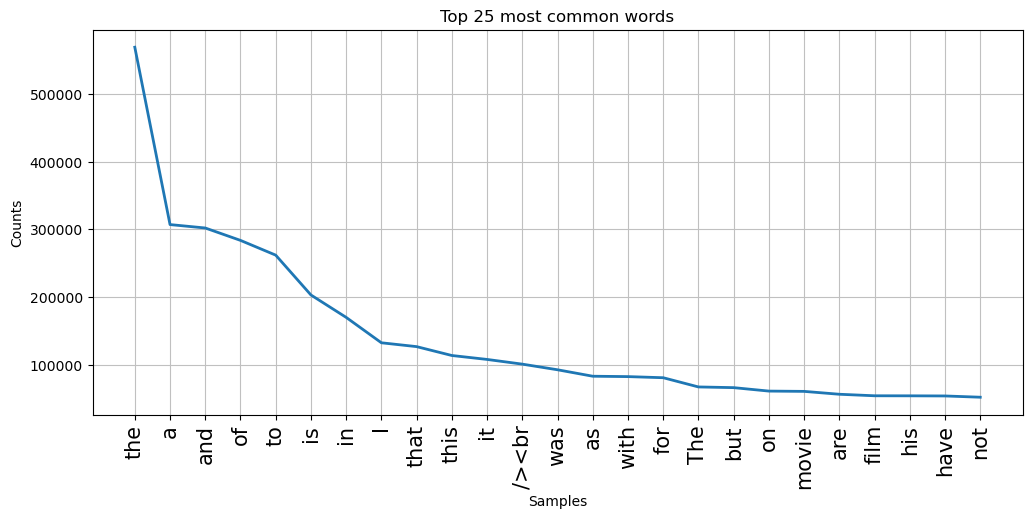

In [63]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


## Plot for Cleaned Tweets

In [64]:
# Write the code for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['one', 'of', 'the', 'other', 'reviewer', 'ha', 'mentioned', 'that', 'after', 'watching', 'just', 'oz', 'episode', 'you', 'will', 'be', 'hooked', 'they', 'are', 'right', 'a', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'br', 'br', 'the', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'wa', 'it', 'brutality', 'and', 'unflinching', 'scene', 'of', 'violence', 'which', 'set', 'in', 'right']


In [65]:
len(set(all_words)) # this is the number of unique words in the list

89706

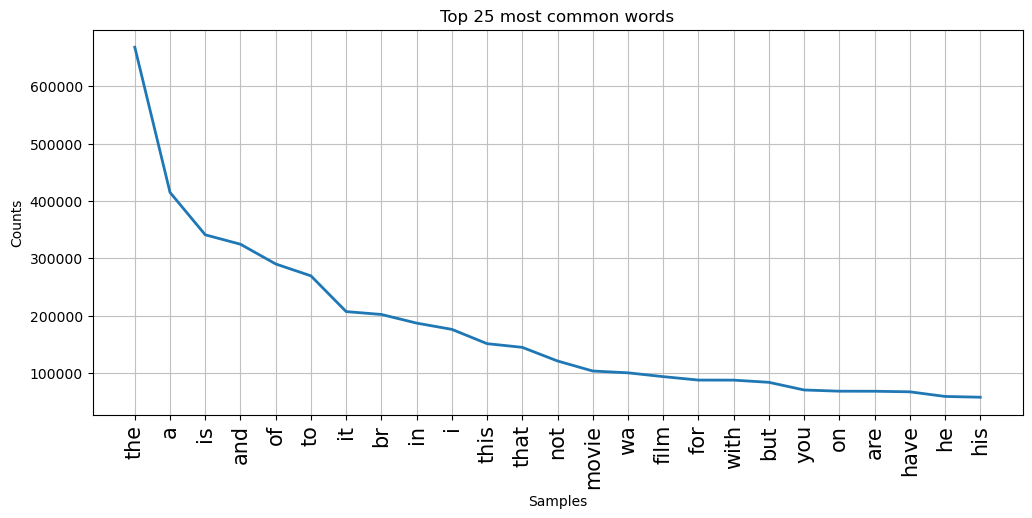

In [66]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


## DV After applying Stop words

In [67]:
type(combined_stopwords)

set

In [149]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in final_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [150]:
cleaned_reviews_without_stpwrd = list(data['review'].apply(tweet_cleaner_with_stopwords))
print(cleaned_reviews_without_stpwrd[:10])

['reviewer mentioned watching episode hooked right exactly happened thing struck brutality unflinching scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word called nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement far away main appeal fact go show dare forget pretty picture painted mainstream audience forget charm forget romance mess episode saw struck nasty surreal ready watched developed taste got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order away mannered middle class inmate turned prison bitch lack street skill prison experience watching comfortable uncomfortable viewing touch darker ', 'wonderful little production filming technique unassuming o

In [152]:
data.columns

Index(['review', 'sentiment', 'cleaned_tweets_w/o_SW',
       'cleaned_tweets_with_SW'],
      dtype='object')

In [153]:
data['cleaned_tweets_with_SW'] = cleaned_reviews_without_stpwrd
data.head()

,review,sentiment,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,One of the other reviewers has mentioned that ...,1,one of the other reviewer ha mentioned that af...,reviewer mentioned watching episode hooked rig...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production br br the filmin...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,i thought this wa a wonderful way to spend tim...,thought wonderful spend hot summer weekend sit...
3,Basically there's a family where a little boy ...,0,basically there is a family where a little boy...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei is love in the time of money is ...,petter mattei love money visually stunning fil...


['reviewer', 'mentioned', 'watching', 'episode', 'hooked', 'right', 'exactly', 'happened', 'thing', 'struck', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face']


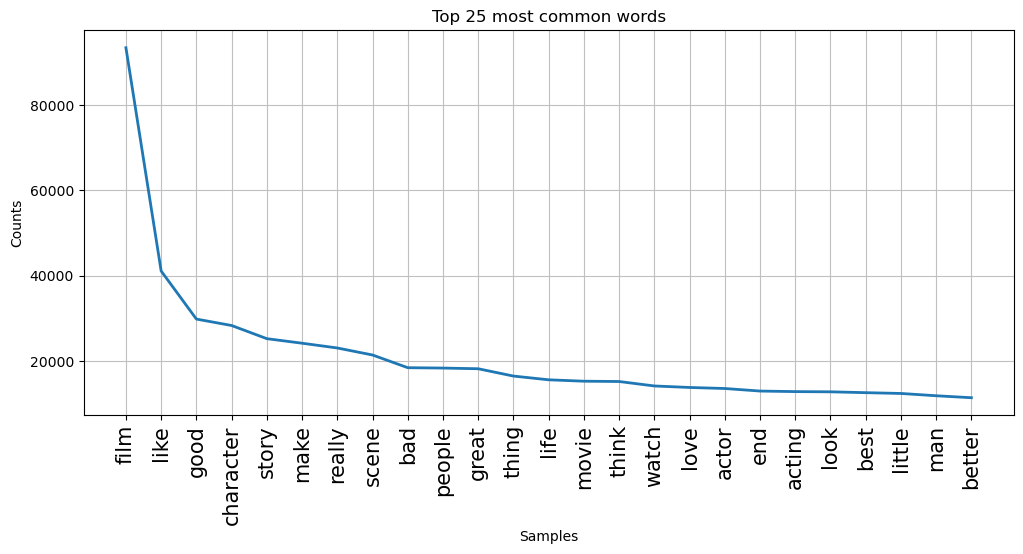

In [154]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [73]:
domain_stopwords = ['way', 'know', 'plot', 'say', 'year', 'seen','time','movie']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [57]:
# HW: re-do the cleaner function to include final_stopwords
# and re-plot and see what more come up!

In [74]:
data.head()

,review,sentiment,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,One of the other reviewers has mentioned that ...,1,one of the other reviewer ha mentioned that af...,reviewer mentioned watching episode hooked rig...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production br br the filmin...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,i thought this wa a wonderful way to spend tim...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there is a family where a little boy...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei is love in the time of money is ...,petter mattei love time money visually stunnin...


# 4. Bag of Words Model (Feature Extraction)

- Countvectorizer
- TF-IDF Vectorizer

In [75]:
data.shape

(50000, 4)

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.sentiment.values
x=tfidf.fit_transform(data.cleaned_tweets_with_SW)

In [156]:
x.shape

(50000, 89077)

In [78]:
data.head()

,review,sentiment,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,One of the other reviewers has mentioned that ...,1,one of the other reviewer ha mentioned that af...,reviewer mentioned watching episode hooked rig...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production br br the filmin...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,i thought this wa a wonderful way to spend tim...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there is a family where a little boy...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei is love in the time of money is ...,petter mattei love time money visually stunnin...


In [79]:
x[0]

<1x89078 sparse matrix of type '<class 'numpy.float64'>'
	with 117 stored elements in Compressed Sparse Row format>

In [80]:
type(x[0])  # each row is a compressed spare row 

scipy.sparse._csr.csr_matrix

In [81]:
x[0].todense()  # decompressing the CSR data

matrix([[0., 0., 0., ..., 0., 0., 0.]])

# 5. Model building

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25,shuffle=False)

In [88]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)  

0.9314133333333333
0.89208


In [102]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)      

0.8734666666666666
0.86416


In [1]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

NameError: name 'clf' is not defined

In [2]:
def prediction(comment):
    preprocessed_comment = tweet_cleaner_with_stopwords(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction("good")

NameError: name 'tweet_cleaner_with_stopwords' is not defined

In [148]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")
    

positive comment
